<center>    
<h2>Algorithm Design Final Project</h2>
<h3>
Housing market prediction by machine learning algorithms</h3>
<h3>SIUM RAKIBUL HASAN</h3>

<br><h4> Supervisor: Prof. Zheng Yu </h4>
</center> 

In [116]:
## Importing required packages.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time
import math
from random import uniform
from scipy.stats import  randint as sp_randint

from tqdm import tqdm


from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score,mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, ridge_regression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector

from lightgbm import LGBMClassifier, LGBMRegressor

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Import Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [117]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format


In [118]:
## Reading the data from the File.

dataset = pd.read_csv("/content/data2021-full.csv")
dataset.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL_CITY,MAIL_STATE,MAIL_ZIPCODE,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FINISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,PlUMBING,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000.00,104 A 104,PUTNAM ST,NaN,EAST BOSTON,2128,1.00,1.00,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,NaN,195 LEXINGTON ST,EAST BOSTON,MA,02128,3.00,NaN,NaN,NaN,1150.00,3353.00,2202.00,"$179,500.00","$539,900.00","$719,400.00","$7,676.00",1900.00,NaN,R -,F - Flat,C - Composition,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,NaN,3.00,12.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,NaN,NaN,3.00,A - Average,NaN
1,100002000,NaN,100002000.00,197,LEXINGTON ST,NaN,EAST BOSTON,2128,1.00,1.00,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,NaN,197 LEXINGTON ST,EAST BOSTON,MA,02128,3.00,NaN,NaN,NaN,1150.00,3299.00,2307.00,"$180,300.00","$564,500.00","$744,800.00","$7,947.02",1920.00,2000.00,R -,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,NaN,3.00,9.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,NaN,NaN,NaN,A - Average,NaN
2,100003000,NaN,100003000.00,199,LEXINGTON ST,NaN,EAST BOSTON,2128,1.00,1.00,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,CHEVARRIA ANA S,NaN,199 LEXINGTON ST,EAST BOSTON,MA,02128,3.00,NaN,NaN,NaN,1150.00,3392.00,2268.00,"$180,800.00","$549,700.00","$730,500.00","$7,794.44",1905.00,1985.00,R -,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,NaN,3.00,13.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,NaN,NaN,NaN,A - Average,NaN
3,100004000,NaN,100004000.00,201,LEXINGTON ST,NaN,EAST BOSTON,2128,1.00,1.00,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS",NaN,PO BOX 557 #,EVERETT,MA,02149,3.00,NaN,NaN,NaN,1150.00,3108.00,2028.00,"$181,400.00","$486,500.00","$667,900.00","$7,126.49",1900.00,1991.00,R -,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,NaN,3.00,11.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,NaN,NaN,NaN,A - Average,NaN
4,100005000,NaN,100005000.00,203,LEXINGTON ST,NaN,EAST BOSTON,2128,1.00,1.00,104,R2,TWO-FAM DWELLING,RE - Row End,Y,DIGIROLAMO JOHN A,NaN,203 LEXINGTON ST,EAST BOSTON,MA,02128,3.00,NaN,NaN,NaN,2010.00,3700.00,2546.00,"$202,800.00","$511,400.00","$714,200.00","$7,620.52",1900.00,1978.00,R -,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,NaN,2.00,13.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,NaN,NaN,NaN,A - Average,NaN


In [119]:
dataset.shape

(177091, 63)

In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177091 entries, 0 to 177090
Data columns (total 63 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PID              177091 non-null  int64  
 1   CM_ID            87251 non-null   float64
 2   GIS_ID           177088 non-null  float64
 3   ST_NUM           167524 non-null  object 
 4   ST_NAME          177091 non-null  object 
 5   UNIT_NUM         76983 non-null   object 
 6   CITY             177091 non-null  object 
 7   ZIPCODE          177091 non-null  int64  
 8   BLDG_SEQ         177035 non-null  float64
 9   NUM_BLDGS        177035 non-null  float64
 10  LUC              177091 non-null  int64  
 11  LU               177091 non-null  object 
 12  LU_DESC          177091 non-null  object 
 13  BLDG_TYPE        175573 non-null  object 
 14  OWN_OCC          176915 non-null  object 
 15  OWNER            177021 non-null  object 
 16  MAIL_ADDRESSEE   39476 non-null   obje

## Data Preprocessing and EDA

In [121]:
duplicates = dataset[dataset.duplicated(['PID'])]
duplicates
print("The number of duplicates found in PID column:", duplicates.count())  # PID = 176

The number of duplicates found in PID column: PID                176
CM_ID                0
GIS_ID             176
ST_NUM             174
ST_NAME            176
UNIT_NUM             0
CITY               176
ZIPCODE            176
BLDG_SEQ           176
NUM_BLDGS          176
LUC                176
LU                 176
LU_DESC            176
BLDG_TYPE          176
OWN_OCC              0
OWNER              175
MAIL_ADDRESSEE      45
MAIL_ADDRESS       175
MAIL_CITY          175
MAIL_STATE         175
MAIL_ZIPCODE       175
RES_FLOOR          175
CD_FLOOR             0
RES_UNITS            0
COM_UNITS            0
LAND_SF              0
GROSS_AREA         176
LIVING_AREA        176
LAND_VALUE           0
BLDG_VALUE           0
TOTAL_VALUE          0
GROSS_TAX            0
YR_BUILT           175
YR_REMODEL          58
STRUCTURE_CLASS    132
ROOF_STRUCTURE     176
ROOF_COVER         176
INT_WALL           172
EXT_FINISHED       176
INT_COND           176
EXT_COND           176
OVERALL_CON

In [123]:
dataset.drop_duplicates(['PID'],keep= 'last', inplace=True)

In [124]:
duplicates = dataset[dataset.duplicated(['PID'])]

print("The number of duplicates found in PID column:", duplicates.count())

The number of duplicates found in PID column: PID                0
CM_ID              0
GIS_ID             0
ST_NUM             0
ST_NAME            0
UNIT_NUM           0
CITY               0
ZIPCODE            0
BLDG_SEQ           0
NUM_BLDGS          0
LUC                0
LU                 0
LU_DESC            0
BLDG_TYPE          0
OWN_OCC            0
OWNER              0
MAIL_ADDRESSEE     0
MAIL_ADDRESS       0
MAIL_CITY          0
MAIL_STATE         0
MAIL_ZIPCODE       0
RES_FLOOR          0
CD_FLOOR           0
RES_UNITS          0
COM_UNITS          0
LAND_SF            0
GROSS_AREA         0
LIVING_AREA        0
LAND_VALUE         0
BLDG_VALUE         0
TOTAL_VALUE        0
GROSS_TAX          0
YR_BUILT           0
YR_REMODEL         0
STRUCTURE_CLASS    0
ROOF_STRUCTURE     0
ROOF_COVER         0
INT_WALL           0
EXT_FINISHED       0
INT_COND           0
EXT_COND           0
OVERALL_COND       0
BED_RMS            0
FULL_BTH           0
HLF_BTH            0
KITCHEN  

In [125]:
# Check the percentage and count of the missing data 

for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    print('{} \t: {}% \t: {}'.format(sum(dataset[col].isnull()), round(pct_missing*100),col))

0 	: 0% 	: PID
89664 	: 51% 	: CM_ID
3 	: 0% 	: GIS_ID
9565 	: 5% 	: ST_NUM
0 	: 0% 	: ST_NAME
99932 	: 56% 	: UNIT_NUM
0 	: 0% 	: CITY
0 	: 0% 	: ZIPCODE
56 	: 0% 	: BLDG_SEQ
56 	: 0% 	: NUM_BLDGS
0 	: 0% 	: LUC
0 	: 0% 	: LU
0 	: 0% 	: LU_DESC
1518 	: 1% 	: BLDG_TYPE
167 	: 0% 	: OWN_OCC
69 	: 0% 	: OWNER
137484 	: 78% 	: MAIL_ADDRESSEE
89 	: 0% 	: MAIL_ADDRESS
75 	: 0% 	: MAIL_CITY
364 	: 0% 	: MAIL_STATE
124 	: 0% 	: MAIL_ZIPCODE
23472 	: 13% 	: RES_FLOOR
117114 	: 66% 	: CD_FLOOR
100446 	: 57% 	: RES_UNITS
163435 	: 92% 	: COM_UNITS
74303 	: 42% 	: LAND_SF
23098 	: 13% 	: GROSS_AREA
23108 	: 13% 	: LIVING_AREA
89019 	: 50% 	: LAND_VALUE
18070 	: 10% 	: BLDG_VALUE
10217 	: 6% 	: TOTAL_VALUE
167 	: 0% 	: GROSS_TAX
23296 	: 13% 	: YR_BUILT
92046 	: 52% 	: YR_REMODEL
98934 	: 56% 	: STRUCTURE_CLASS
36808 	: 21% 	: ROOF_STRUCTURE
36802 	: 21% 	: ROOF_COVER
47352 	: 27% 	: INT_WALL
23392 	: 13% 	: EXT_FINISHED
47342 	: 27% 	: INT_COND
36791 	: 21% 	: EXT_COND
9237 	: 5% 	: OVERALL_COND


In [126]:
index_names = ['PID','CM_ID','GIS_ID','ST_NUM','UNIT_NUM','MAIL_ADDRESSEE','LUC','LU', \
                       'CD_FLOOR','RES_FLOOR','RES_UNITS','COM_UNITS','LAND_SF', 'LU_DESC',\
                       'LAND_VALUE','YR_REMODEL','STRUCTURE_CLASS','ROOF_STRUCTURE', \
                       'ROOF_COVER','INT_WALL','INT_COND','BED_RMS','HLF_BTH','FULL_BTH',
                       'BDRM_COND', 'BTHRM_STYLE2','BTHRM_STYLE3','KITCHEN_STYLE2', \
                       'KITCHEN_STYLE3', 'HEAT_FUEL', 'FIRE_PLACE', 'PlUMBING', \
                       'NUM_PARKING', 'PROP_VIEW', 'CORNER_UNIT', \
                       'OWNER', 'OWN_OCC', 'ST_NAME','MAIL_ADDRESS',
                        'MAIL_CITY', 'MAIL_ZIPCODE','OVERALL_COND','KITCHEN_STYLE1']

    
    
# drop these row 
# from dataFrame
BosProp = dataset.drop(index_names, inplace = False, axis='columns')

In [127]:
BosProp.head(5)


,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,BLDG_TYPE,MAIL_STATE,GROSS_AREA,LIVING_AREA,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,EXT_FINISHED,EXT_COND,KITCHEN,TT_RMS,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE
0,EAST BOSTON,2128,1.00,1.00,RE - Row End,MA,3353.00,2202.00,"$539,900.00","$719,400.00","$7,676.00",1900.00,A - Asbestos,F - Fair,3.00,12.00,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None
1,EAST BOSTON,2128,1.00,1.00,RM - Row Middle,MA,3299.00,2307.00,"$564,500.00","$744,800.00","$7,947.02",1920.00,M - Vinyl,A - Average,3.00,9.00,M - Modern,3F - 3 Full Eat In Kitchens,F - Forced Hot Air,C - Central AC
2,EAST BOSTON,2128,1.00,1.00,RM - Row Middle,MA,3392.00,2268.00,"$549,700.00","$730,500.00","$7,794.44",1905.00,M - Vinyl,G - Good,3.00,13.00,M - Modern,3F - 3 Full Eat In Kitchens,S - Space Heat,N - None
3,EAST BOSTON,2128,1.00,1.00,RM - Row Middle,MA,3108.00,2028.00,"$486,500.00","$667,900.00","$7,126.49",1900.00,M - Vinyl,A - Average,3.00,11.00,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None
4,EAST BOSTON,2128,1.00,1.00,RE - Row End,MA,3700.00,2546.00,"$511,400.00","$714,200.00","$7,620.52",1900.00,M - Vinyl,A - Average,2.00,13.00,S - Semi-Modern,2F - 2 Full Eat In Kitchens,W - Ht Water/Steam,N - None


In [128]:
# Check the percentage and count of the missing data 

for col in BosProp.columns:
    pct_missing = np.mean(BosProp[col].isnull())
    print('{} \t: {}% \t: {}'.format(sum(BosProp[col].isnull()), round(pct_missing*100),col))

0 	: 0% 	: CITY
0 	: 0% 	: ZIPCODE
56 	: 0% 	: BLDG_SEQ
56 	: 0% 	: NUM_BLDGS
1518 	: 1% 	: BLDG_TYPE
364 	: 0% 	: MAIL_STATE
23098 	: 13% 	: GROSS_AREA
23108 	: 13% 	: LIVING_AREA
18070 	: 10% 	: BLDG_VALUE
10217 	: 6% 	: TOTAL_VALUE
167 	: 0% 	: GROSS_TAX
23296 	: 13% 	: YR_BUILT
23392 	: 13% 	: EXT_FINISHED
36791 	: 21% 	: EXT_COND
47460 	: 27% 	: KITCHEN
47712 	: 27% 	: TT_RMS
47458 	: 27% 	: BTHRM_STYLE1
47471 	: 27% 	: KITCHEN_TYPE
47615 	: 27% 	: HEAT_TYPE
47616 	: 27% 	: AC_TYPE


In [129]:
BosProp.dropna(subset=['AC_TYPE'],inplace=True)

In [130]:
# Check the percentage and count of the missing data 

for col in BosProp.columns:
    pct_missing = np.mean(BosProp[col].isnull())

    print('{} \t: {}% \t: {}'.format(sum(BosProp[col].isnull()), round(pct_missing*1000),col))

0 	: 0% 	: CITY
0 	: 0% 	: ZIPCODE
0 	: 0% 	: BLDG_SEQ
0 	: 0% 	: NUM_BLDGS
0 	: 0% 	: BLDG_TYPE
290 	: 2% 	: MAIL_STATE
25 	: 0% 	: GROSS_AREA
26 	: 0% 	: LIVING_AREA
175 	: 1% 	: BLDG_VALUE
167 	: 1% 	: TOTAL_VALUE
167 	: 1% 	: GROSS_TAX
38 	: 0% 	: YR_BUILT
0 	: 0% 	: EXT_FINISHED
6 	: 0% 	: EXT_COND
38 	: 0% 	: KITCHEN
102 	: 1% 	: TT_RMS
25 	: 0% 	: BTHRM_STYLE1
37 	: 0% 	: KITCHEN_TYPE
1 	: 0% 	: HEAT_TYPE
0 	: 0% 	: AC_TYPE


In [131]:
# Droping the rows with missing values.
BosProp.dropna(inplace=True)


In [132]:
# Check the percentage and count of the missing data 

for col in BosProp.columns:
    pct_missing = np.mean(BosProp[col].isnull())
    print('{} \t: {}% \t: {}'.format(sum(BosProp[col].isnull()), round(pct_missing*100),col))

0 	: 0% 	: CITY
0 	: 0% 	: ZIPCODE
0 	: 0% 	: BLDG_SEQ
0 	: 0% 	: NUM_BLDGS
0 	: 0% 	: BLDG_TYPE
0 	: 0% 	: MAIL_STATE
0 	: 0% 	: GROSS_AREA
0 	: 0% 	: LIVING_AREA
0 	: 0% 	: BLDG_VALUE
0 	: 0% 	: TOTAL_VALUE
0 	: 0% 	: GROSS_TAX
0 	: 0% 	: YR_BUILT
0 	: 0% 	: EXT_FINISHED
0 	: 0% 	: EXT_COND
0 	: 0% 	: KITCHEN
0 	: 0% 	: TT_RMS
0 	: 0% 	: BTHRM_STYLE1
0 	: 0% 	: KITCHEN_TYPE
0 	: 0% 	: HEAT_TYPE
0 	: 0% 	: AC_TYPE


In [133]:
BosProp.shape #(122570, 32) to (128825, 22)

(128678, 20)

In [134]:
## Counting all the states values as we focus on MA (Boston)  only.

BosProp["MAIL_STATE"].value_counts()

MA                123952
NY                   727
FL                   711
CA                   601
NH                   498
CT                   314
NJ                   218
RI                   173
TX                   159
PA                   111
ME                   105
MD                    94
VA                    89
NC                    73
IL                    73
GA                    69
OH                    62
CO                    61
VT                    55
AZ                    51
SC                    42
WA                    40
MI                    38
MO                    34
TN                    33
NV                    28
HI                    27
DE                    27
MN                    24
DC                    22
UT                    18
OR                    15
NM                    15
IN                    14
WI                    12
LA                    11
KS                    10
WY                     7
ID                     6
MS                     6


In [135]:
## Keeping only MA values as we focus on Boston only.


index_names = BosProp[ BosProp['MAIL_STATE'] != 'MA' ].index
  
# drop these row indexes
# from dataFrame
BosProp.drop(index_names, inplace = True) ## (124101, 22)

In [136]:
## As all the values are MA, it woudl not make sense to perform predective anlytics on it.     
    
# drop these row 
# from dataFrame
BosProp.drop('MAIL_STATE', inplace = True, axis='columns')

In [137]:
### Converting currency to float.
### The currency was in $719,400.00 format. we need to conveert it to 719400.00 to perform perform predective anlytics on it.

for col in ['BLDG_VALUE','TOTAL_VALUE','GROSS_TAX']:
    BosProp[col]=BosProp[col].replace({'\$': '', ',': ''}, regex=True,).astype(float)

In [138]:
BosProp.head(3)

,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,BLDG_TYPE,GROSS_AREA,LIVING_AREA,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,EXT_FINISHED,EXT_COND,KITCHEN,TT_RMS,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE
0,EAST BOSTON,2128,1.00,1.00,RE - Row End,3353.00,2202.00,539900.00,719400.00,7676.00,1900.00,A - Asbestos,F - Fair,3.00,12.00,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None
1,EAST BOSTON,2128,1.00,1.00,RM - Row Middle,3299.00,2307.00,564500.00,744800.00,7947.02,1920.00,M - Vinyl,A - Average,3.00,9.00,M - Modern,3F - 3 Full Eat In Kitchens,F - Forced Hot Air,C - Central AC
2,EAST BOSTON,2128,1.00,1.00,RM - Row Middle,3392.00,2268.00,549700.00,730500.00,7794.44,1905.00,M - Vinyl,G - Good,3.00,13.00,M - Modern,3F - 3 Full Eat In Kitchens,S - Space Heat,N - None


In [139]:
## To detect counts and destribution among categorical values.


for col in ['CITY','NUM_BLDGS','BLDG_TYPE','YR_BUILT','EXT_FINISHED', 'EXT_COND','KITCHEN','TT_RMS','BTHRM_STYLE1','KITCHEN_TYPE','HEAT_TYPE','AC_TYPE']:
    print("# # # # #  ",col,"  # # # # #")
    display(BosProp[[col]].value_counts())
    

# # # # #   CITY   # # # # #


CITY           
BOSTON             27967
DORCHESTER         21157
SOUTH BOSTON       10106
BRIGHTON            9240
WEST ROXBURY        8683
JAMAICA PLAIN       8557
HYDE PARK           7305
ROSLINDALE          7300
EAST BOSTON         6442
CHARLESTOWN         4968
MATTAPAN            3678
ROXBURY             3371
ALLSTON             3181
ROXBURY CROSSIN     1050
CHESTNUT HILL        926
BROOKLINE             16
DEDHAM                 5
dtype: int64

# # # # #   NUM_BLDGS   # # # # #


NUM_BLDGS
1.00         123935
2.00             10
3.00              3
4.00              2
5.00              2
dtype: int64

# # # # #   BLDG_TYPE   # # # # #


BLDG_TYPE             
CL - Colonial             16582
RM - Row Middle           14156
CV - Conventional         12785
LR - Low Rise             12704
DK - Decker               12228
MR - Mid Rise             11456
FS - Free Standing         8856
RE - Row End               7000
TF - Two Fam Stack         6084
HR - High Rise             5971
SD - Semi-Det              4149
CP - Cape                  3697
TH - Town House            2248
RN - Ranch                 1913
DX - Duplex                1550
BW - Bungalow              1082
RR - Raised Ranch           839
VT - Victorian              246
SL - Split Level            209
TD - Tudor                   75
CN - Contemporary            71
TL - Tri-Level               28
OT - Other                   11
111 - APT 4-6 UNITS           4
BL - Bi-Level                 4
112 - APT 7-30 UNITS          2
121 - ROOMING HOUSE           1
104 - TWO-FAM DWELLING        1
dtype: int64

# # # # #   YR_BUILT   # # # # #


YR_BUILT
1900.00     14827
1910.00      9483
1920.00      9412
1905.00      8956
1890.00      7951
            ...  
1804.00         1
1806.00         1
1819.00         1
1823.00         1
1700.00         1
Length: 232, dtype: int64

# # # # #   EXT_FINISHED   # # # # #


EXT_FINISHED      
B - Brick/Stone       43567
M - Vinyl             39067
W - Wood Shake        15271
F - Frame/Clapbrd     11438
C - Cement Board       4652
A - Asbestos           3878
G - Glass              2393
S - Stucco             1162
P - Asphalt             953
U - Alum Siding         643
V - Brck/Stn Venr       485
O - Other               213
K - Concrete            159
01 - Brick               42
09 - Wood Siding         26
10 - Alum/Vinyl           2
05 - Concr & Glass        1
dtype: int64

# # # # #   EXT_COND   # # # # #


EXT_COND     
A - Average      72867
G - Good         44117
E - Excellent     4664
F - Fair          2219
P - Poor            85
dtype: int64

# # # # #   KITCHEN   # # # # #


KITCHEN
1.00       92734
2.00       17462
3.00       13639
4.00         116
5.00           1
dtype: int64

# # # # #   TT_RMS   # # # # #


TT_RMS
4.00      21197
5.00      16818
6.00      14638
3.00      14075
7.00      10144
8.00       7255
10.00      5635
12.00      5098
9.00       4722
15.00      4598
11.00      4255
2.00       4153
14.00      3140
18.00      2361
13.00      2288
17.00      1296
16.00       943
1.00        621
20.00       283
21.00       199
19.00       162
22.00        22
23.00        17
24.00        17
26.00         6
25.00         4
27.00         4
34.00         1
dtype: int64

# # # # #   BTHRM_STYLE1   # # # # #


BTHRM_STYLE1     
S - Semi-Modern      59464
M - Modern           52825
N - No Remodeling     5846
L - Luxury            5817
dtype: int64

# # # # #   KITCHEN_TYPE   # # # # #


KITCHEN_TYPE               
O - One Person                 38494
1F - 1 Full Eat In Kitchens    29128
F - Full Eat In                22194
2F - 2 Full Eat In Kitchens    16787
3F - 3 Full Eat In Kitchens    12082
0F - 0 Full Eat In Kitchens     2626
P - Pullman                     2503
N - None                         111
4F - 4 Full Eat In Kitchens       26
5F - 5 Full Eat In Kitchens        1
dtype: int64

# # # # #   HEAT_TYPE   # # # # #


HEAT_TYPE         
W - Ht Water/Steam    69347
F - Forced Hot Air    44121
E - Electric           5583
P - Heat Pump          4102
S - Space Heat          677
N - None                 85
O - Other                37
dtype: int64

# # # # #   AC_TYPE   # # # # #


AC_TYPE        
N - None           77929
C - Central AC     45324
D - Ductless AC      698
Y - Yes                1
dtype: int64

In [140]:
## Now that we have all data cleaned, We performed describe function to know the count, unique, max, min and other paterns.
BosProp.describe(include="all",datetime_is_numeric=True)

,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,BLDG_TYPE,GROSS_AREA,LIVING_AREA,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,EXT_FINISHED,EXT_COND,KITCHEN,TT_RMS,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE
count,123952,123952.00,123952.00,123952.00,123952,123952.00,123952.00,123952.00,123952.00,123952.00,123952.00,123952,123952,123952.00,123952.00,123952,123952,123952,123952
unique,17,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,17,5,NaN,NaN,4,10,7,4
top,BOSTON,NaN,NaN,NaN,CL - Colonial,NaN,NaN,NaN,NaN,NaN,NaN,B - Brick/Stone,A - Average,NaN,NaN,S - Semi-Modern,O - One Person,W - Ht Water/Steam,N - None
freq,27967,NaN,NaN,NaN,16582,NaN,NaN,NaN,NaN,NaN,NaN,43567,72867,NaN,NaN,59464,38494,69347,77929
mean,NaN,2130.66,1.00,1.00,NaN,2348.70,1727.73,647875.63,765435.80,8148.73,1929.19,NaN,NaN,1.36,7.10,NaN,NaN,NaN,NaN
std,NaN,33.35,0.00,0.02,NaN,1687.05,1078.27,677260.14,746124.59,7968.12,42.22,NaN,NaN,0.68,4.06,NaN,NaN,NaN,NaN
min,NaN,2026.00,1.00,1.00,NaN,11.00,1.00,100.00,31800.00,0.00,1700.00,NaN,NaN,1.00,1.00,NaN,NaN,NaN,NaN
25%,NaN,2121.00,1.00,1.00,NaN,948.00,925.00,355400.00,444800.00,4737.48,1900.00,NaN,NaN,1.00,4.00,NaN,NaN,NaN,NaN
50%,NaN,2127.00,1.00,1.00,NaN,1920.00,1412.00,491000.00,601800.00,6411.61,1915.00,NaN,NaN,1.00,6.00,NaN,NaN,NaN,NaN
75%,NaN,2132.00,1.00,1.00,NaN,3408.00,2307.00,704500.00,835700.00,8906.25,1958.00,NaN,NaN,2.00,9.00,NaN,NaN,NaN,NaN


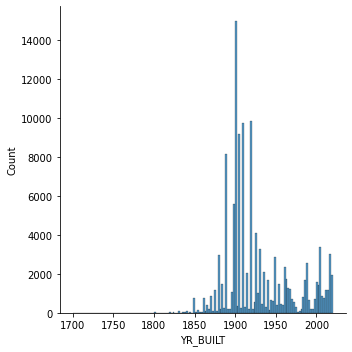

In [141]:
#BosProp['TOTAL_VALUE'].sum()/123921

## A Bar plot to see, YR_BUILT Desctribution

sns.displot(data=BosProp['YR_BUILT'])

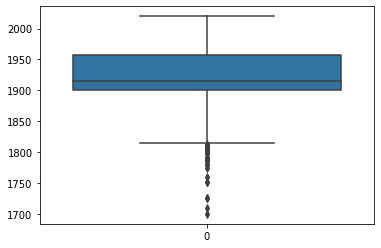

In [142]:
## A Box plot to see, YR_BUILT outliars and quartraints 

sns.boxplot(data=BosProp['YR_BUILT'])

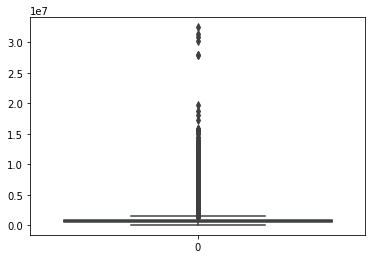

In [143]:
## A Box plot to see, TOTAL_VALUE outliars and quartraints 

sns.boxplot(data=BosProp['TOTAL_VALUE'])

In [144]:
## Displaying outliars in TOTAL_VALUE that is values above 2000000


BosProp['TOTAL_VALUE'][BosProp.TOTAL_VALUE>2100000]

9594     2425200.00
9970     2282100.00
9981     2970400.00
9982     2198700.00
9983     2232200.00
            ...    
168706   2210200.00
175293   2451400.00
175532   2601900.00
175778   2765800.00
175779   2543100.00
Name: TOTAL_VALUE, Length: 3995, dtype: float64

In [145]:
## Removing outliars in TOTAL_VALUE that is values above 2000000

index_names = BosProp[ BosProp.TOTAL_VALUE>2000000 ].index
  
# drop these row indexes
# from dataFrame
BosProp.drop(index_names, inplace = True)
BosProp.TOTAL_VALUE.value_counts()

261700.00     106
334200.00     105
200400.00      48
513100.00      46
46600.00       41
             ... 
1824800.00      1
1685900.00      1
985700.00       1
1290800.00      1
1100200.00      1
Name: TOTAL_VALUE, Length: 15477, dtype: int64

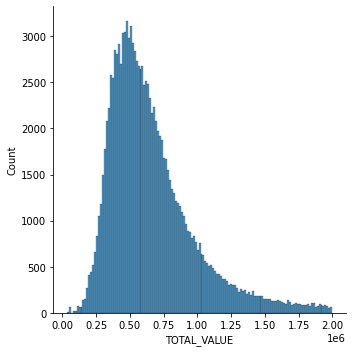

In [146]:

## A Box plot to see, TOTAL_VALUE outliars and quartraints 


sns.displot(data=BosProp['TOTAL_VALUE'])

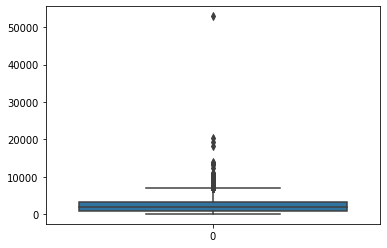

In [147]:
## A Box plot to see, GROSS_AREA outliars and quartraints 


sns.boxplot(data=BosProp['GROSS_AREA'])

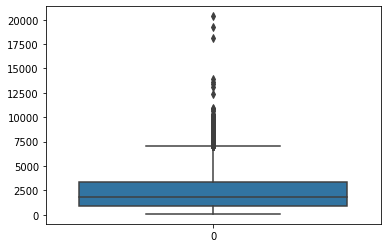

In [148]:
#BosProp[BosProp['GROSS_AREA']<25000]


## Removing outliars in GROSS_AREA that is values above 25000


sns.boxplot(data=BosProp[BosProp['GROSS_AREA']<25000]['GROSS_AREA'])

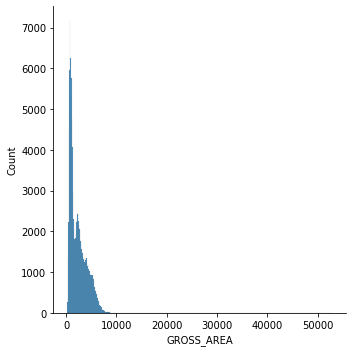

In [149]:
## A Bar plot to see, GROSS_AREA Desctribution


sns.displot(data=BosProp['GROSS_AREA'])


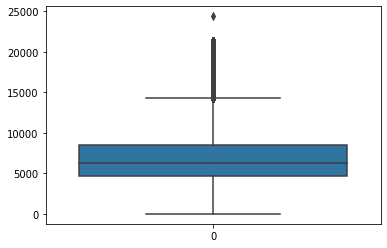

In [150]:
## A Box plot to see, GROSS_TAX outliars and quartraints 



sns.boxplot(data=BosProp['GROSS_TAX'])

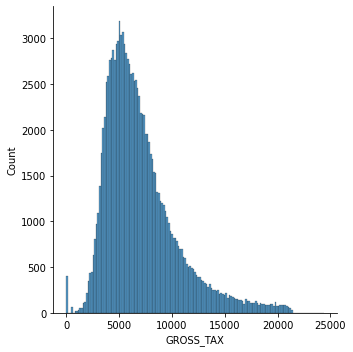

In [151]:
## A Bar plot to see, GROSS_TAX Desctribution


sns.displot(BosProp['GROSS_TAX'])



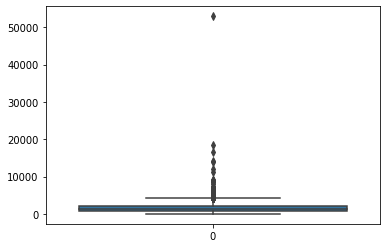

In [152]:
## A Box plot to see, LIVING_AREA outliars and quartraints 


sns.boxplot(data=BosProp['LIVING_AREA'])

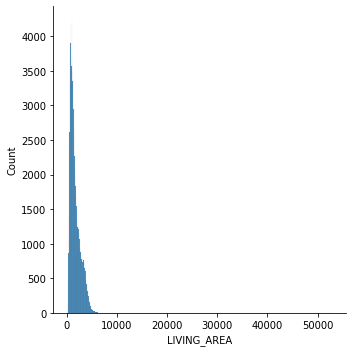

In [153]:
## A Bar plot to see, LIVING_AREA Desctribution


sns.displot(BosProp['LIVING_AREA'])


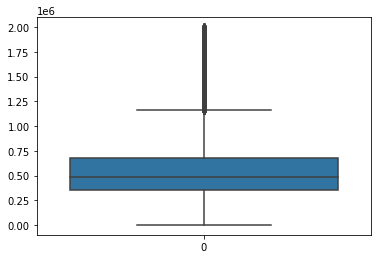

In [154]:
## A Box plot to see, BLDG_VALUE outliars and quartraints 


sns.boxplot(data=BosProp['BLDG_VALUE'])

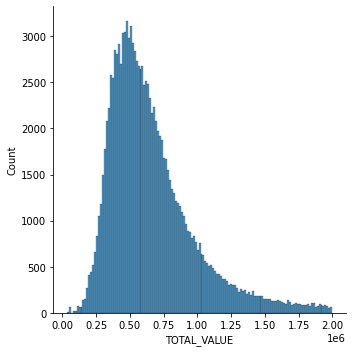

In [155]:
## A Bar plot to see, TOTAL_VALUE Desctribution


sns.displot(BosProp['TOTAL_VALUE'])

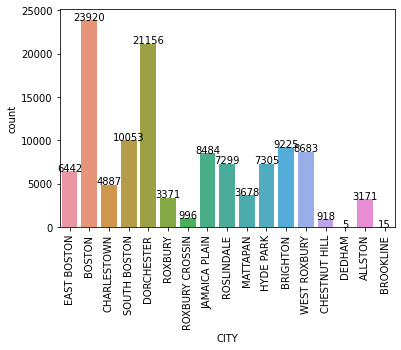

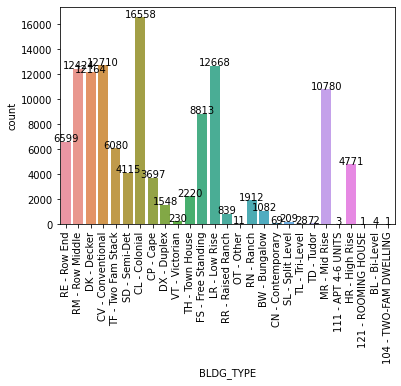

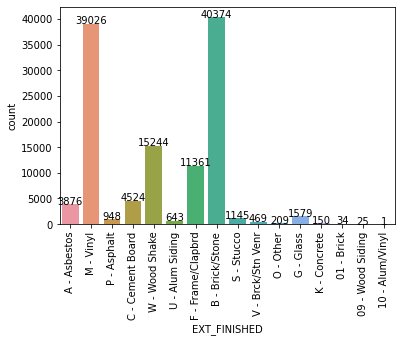

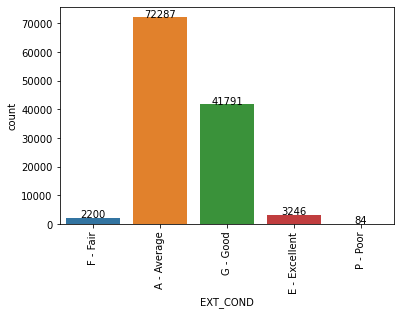

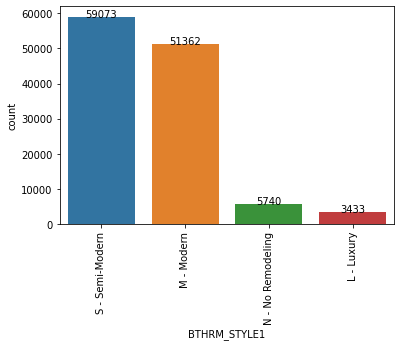

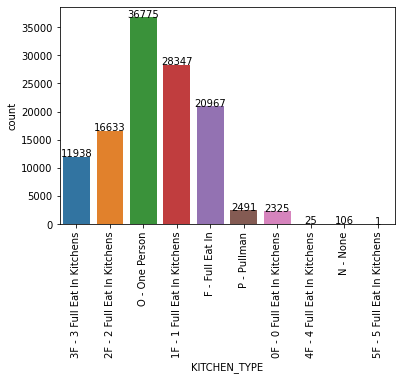

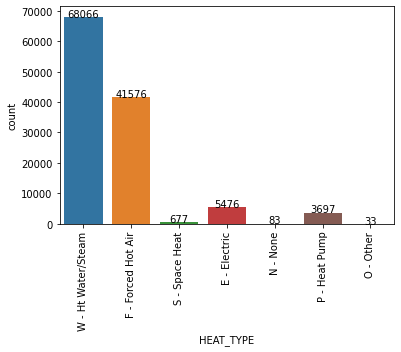

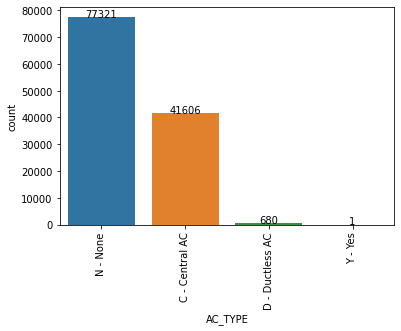

In [156]:
## A Bar plot to see, Desctribution, count of unique values in each feature. 


for i in ['CITY','BLDG_TYPE','EXT_FINISHED','EXT_COND','BTHRM_STYLE1','KITCHEN_TYPE','HEAT_TYPE','AC_TYPE']:
    fig, ax1 = plt.subplots(figsize=(6,4))
    graph = sns.countplot(ax=ax1,x=i, data=BosProp)
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.5,height ,ha="center")

plt.show()




In [157]:
77920/124101*100 

62.78756819042554

In [158]:
## Checking if we have all the data in required format, not-null count, total records and features

BosProp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119608 entries, 0 to 177085
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CITY          119608 non-null  object 
 1   ZIPCODE       119608 non-null  int64  
 2   BLDG_SEQ      119608 non-null  float64
 3   NUM_BLDGS     119608 non-null  float64
 4   BLDG_TYPE     119608 non-null  object 
 5   GROSS_AREA    119608 non-null  float64
 6   LIVING_AREA   119608 non-null  float64
 7   BLDG_VALUE    119608 non-null  float64
 8   TOTAL_VALUE   119608 non-null  float64
 9   GROSS_TAX     119608 non-null  float64
 10  YR_BUILT      119608 non-null  float64
 11  EXT_FINISHED  119608 non-null  object 
 12  EXT_COND      119608 non-null  object 
 13  KITCHEN       119608 non-null  float64
 14  TT_RMS        119608 non-null  float64
 15  BTHRM_STYLE1  119608 non-null  object 
 16  KITCHEN_TYPE  119608 non-null  object 
 17  HEAT_TYPE     119608 non-null  object 
 18  AC_T

In [159]:
# Checking the mean property value with respect to the city.

(BosProp[['TOTAL_VALUE','CITY']].groupby(['CITY']).mean()*0.1).nlargest(5, 'TOTAL_VALUE')

,TOTAL_VALUE
CITY,
BROOKLINE,98912.00
ROXBURY CROSSIN,86910.85
CHARLESTOWN,82973.38
BOSTON,82797.47
SOUTH BOSTON,78013.91


In [160]:
# Checking the min property value with respect to the city.


BosProp[['TOTAL_VALUE','CITY']].groupby(['CITY']).min().nlargest(5, 'TOTAL_VALUE')#.groupby(['TOTAL_VALUE']).mean()


,TOTAL_VALUE
CITY,
DEDHAM,484800.00
BROOKLINE,232600.00
CHESTNUT HILL,207100.00
ROXBURY CROSSIN,153300.00
MATTAPAN,132400.00


In [161]:
# Checking the max property value with respect to the city.


BosProp[['TOTAL_VALUE','CITY']].groupby(['CITY']).max().nsmallest(5, 'TOTAL_VALUE')#.groupby(['TOTAL_VALUE']).mean()


,TOTAL_VALUE
CITY,
DEDHAM,899900.00
MATTAPAN,1380100.00
HYDE PARK,1542300.00
WEST ROXBURY,1673400.00
DORCHESTER,1691700.00


In [162]:
nullseries = BosProp.isnull().sum()
display(nullseries)
print(nullseries[nullseries > 20])  ## Double checking if any missing values are leftout. 


CITY            0
ZIPCODE         0
BLDG_SEQ        0
NUM_BLDGS       0
BLDG_TYPE       0
GROSS_AREA      0
LIVING_AREA     0
BLDG_VALUE      0
TOTAL_VALUE     0
GROSS_TAX       0
YR_BUILT        0
EXT_FINISHED    0
EXT_COND        0
KITCHEN         0
TT_RMS          0
BTHRM_STYLE1    0
KITCHEN_TYPE    0
HEAT_TYPE       0
AC_TYPE         0
dtype: int64

Series([], dtype: int64)


In [163]:
BosProp.keys()

Index(['CITY', 'ZIPCODE', 'BLDG_SEQ', 'NUM_BLDGS', 'BLDG_TYPE', 'GROSS_AREA',
       'LIVING_AREA', 'BLDG_VALUE', 'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT',
       'EXT_FINISHED', 'EXT_COND', 'KITCHEN', 'TT_RMS', 'BTHRM_STYLE1',
       'KITCHEN_TYPE', 'HEAT_TYPE', 'AC_TYPE'],
      dtype='object')

In [164]:
for col in ['CITY', 'ZIPCODE', 'BLDG_TYPE', 'EXT_FINISHED', 'EXT_COND', 'KITCHEN', 'BTHRM_STYLE1', 'KITCHEN_TYPE', 'HEAT_TYPE', 'AC_TYPE'] :
    print("# # # # #  ",col,"  # # # # #")
    display(BosProp[[col]].value_counts())
    

# # # # #   CITY   # # # # #


CITY           
BOSTON             23920
DORCHESTER         21156
SOUTH BOSTON       10053
BRIGHTON            9225
WEST ROXBURY        8683
JAMAICA PLAIN       8484
HYDE PARK           7305
ROSLINDALE          7299
EAST BOSTON         6442
CHARLESTOWN         4887
MATTAPAN            3678
ROXBURY             3371
ALLSTON             3171
ROXBURY CROSSIN      996
CHESTNUT HILL        918
BROOKLINE             15
DEDHAM                 5
dtype: int64

# # # # #   ZIPCODE   # # # # #


ZIPCODE
2127       10062
2135        9225
2132        8684
2124        8515
2130        8485
2136        7307
2131        7299
2128        6442
2125        5341
2116        4902
2129        4886
2122        4654
2118        4548
2126        3681
2119        3340
2134        3171
2114        2819
2121        2772
2115        2592
2215        2102
2111        1550
2113        1260
2110        1201
2109        1138
2120        1021
2467         918
2210         845
2108         823
2446          10
2199           5
2445           5
2026           5
dtype: int64

# # # # #   BLDG_TYPE   # # # # #


BLDG_TYPE             
CL - Colonial             16558
CV - Conventional         12710
LR - Low Rise             12668
RM - Row Middle           12424
DK - Decker               12164
MR - Mid Rise             10780
FS - Free Standing         8813
RE - Row End               6599
TF - Two Fam Stack         6080
HR - High Rise             4771
SD - Semi-Det              4115
CP - Cape                  3697
TH - Town House            2220
RN - Ranch                 1912
DX - Duplex                1548
BW - Bungalow              1082
RR - Raised Ranch           839
VT - Victorian              230
SL - Split Level            209
TD - Tudor                   72
CN - Contemporary            69
TL - Tri-Level               28
OT - Other                   11
BL - Bi-Level                 4
111 - APT 4-6 UNITS           3
121 - ROOMING HOUSE           1
104 - TWO-FAM DWELLING        1
dtype: int64

# # # # #   EXT_FINISHED   # # # # #


EXT_FINISHED     
B - Brick/Stone      40374
M - Vinyl            39026
W - Wood Shake       15244
F - Frame/Clapbrd    11361
C - Cement Board      4524
A - Asbestos          3876
G - Glass             1579
S - Stucco            1145
P - Asphalt            948
U - Alum Siding        643
V - Brck/Stn Venr      469
O - Other              209
K - Concrete           150
01 - Brick              34
09 - Wood Siding        25
10 - Alum/Vinyl          1
dtype: int64

# # # # #   EXT_COND   # # # # #


EXT_COND     
A - Average      72287
G - Good         41791
E - Excellent     3246
F - Fair          2200
P - Poor            84
dtype: int64

# # # # #   KITCHEN   # # # # #


KITCHEN
1.00       89118
2.00       17037
3.00       13346
4.00         106
5.00           1
dtype: int64

# # # # #   BTHRM_STYLE1   # # # # #


BTHRM_STYLE1     
S - Semi-Modern      59073
M - Modern           51362
N - No Remodeling     5740
L - Luxury            3433
dtype: int64

# # # # #   KITCHEN_TYPE   # # # # #


KITCHEN_TYPE               
O - One Person                 36775
1F - 1 Full Eat In Kitchens    28347
F - Full Eat In                20967
2F - 2 Full Eat In Kitchens    16633
3F - 3 Full Eat In Kitchens    11938
P - Pullman                     2491
0F - 0 Full Eat In Kitchens     2325
N - None                         106
4F - 4 Full Eat In Kitchens       25
5F - 5 Full Eat In Kitchens        1
dtype: int64

# # # # #   HEAT_TYPE   # # # # #


HEAT_TYPE         
W - Ht Water/Steam    68066
F - Forced Hot Air    41576
E - Electric           5476
P - Heat Pump          3697
S - Space Heat          677
N - None                 83
O - Other                33
dtype: int64

# # # # #   AC_TYPE   # # # # #


AC_TYPE        
N - None           77321
C - Central AC     41606
D - Ductless AC      680
Y - Yes                1
dtype: int64

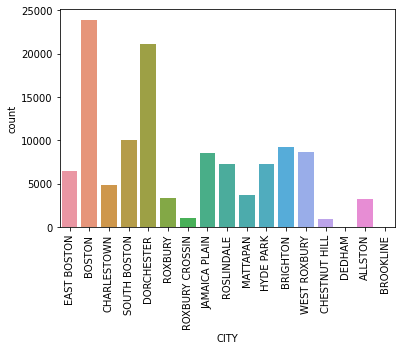

In [165]:
sns.countplot(data=BosProp, x='CITY')
plt.xticks(rotation=90)
plt.show()

In [166]:
BosProp.select_dtypes(include='object').keys()

Index(['CITY', 'BLDG_TYPE', 'EXT_FINISHED', 'EXT_COND', 'BTHRM_STYLE1',
       'KITCHEN_TYPE', 'HEAT_TYPE', 'AC_TYPE'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

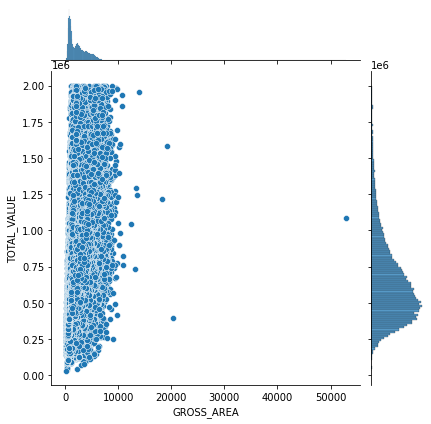

In [167]:
plt.figure(figsize = (20,20))

sns.jointplot(x='GROSS_AREA', y='TOTAL_VALUE', data=BosProp)

plt.show()
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


In [168]:
fltBos = BosProp[BosProp['GROSS_AREA']>20000]

In [169]:
# fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15, 8))
# index = 0
# axs = axs.flatten()
# for k,v in fltBos.select_dtypes(include='number').items():
#     sns.boxplot(y=k, data=fltBos, ax=axs[index])
#     index += 1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [170]:
#fltBos.hist(figsize=(8,7))
plt.show()

In [171]:
# import seaborn as sns
# from matplotlib import pyplot as plt
# sns.set_style("ticks")
# sns.pairplot(BosProp,hue = 'ZIPCODE',diag_kind = "kde",kind = "scatter",palette = "husl")
# plt.show()

 ## Feature Engineering

In [172]:
BosProp

,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,BLDG_TYPE,GROSS_AREA,LIVING_AREA,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,EXT_FINISHED,EXT_COND,KITCHEN,TT_RMS,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE
0,EAST BOSTON,2128,1.00,1.00,RE - Row End,3353.00,2202.00,539900.00,719400.00,7676.00,1900.00,A - Asbestos,F - Fair,3.00,12.00,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None
1,EAST BOSTON,2128,1.00,1.00,RM - Row Middle,3299.00,2307.00,564500.00,744800.00,7947.02,1920.00,M - Vinyl,A - Average,3.00,9.00,M - Modern,3F - 3 Full Eat In Kitchens,F - Forced Hot Air,C - Central AC
2,EAST BOSTON,2128,1.00,1.00,RM - Row Middle,3392.00,2268.00,549700.00,730500.00,7794.44,1905.00,M - Vinyl,G - Good,3.00,13.00,M - Modern,3F - 3 Full Eat In Kitchens,S - Space Heat,N - None
3,EAST BOSTON,2128,1.00,1.00,RM - Row Middle,3108.00,2028.00,486500.00,667900.00,7126.49,1900.00,M - Vinyl,A - Average,3.00,11.00,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None
4,EAST BOSTON,2128,1.00,1.00,RE - Row End,3700.00,2546.00,511400.00,714200.00,7620.52,1900.00,M - Vinyl,A - Average,2.00,13.00,S - Semi-Modern,2F - 2 Full Eat In Kitchens,W - Ht Water/Steam,N - None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177080,BRIGHTON,2135,1.00,1.00,SD - Semi-Det,3619.00,2347.00,525600.00,778400.00,8305.53,1920.00,S - Stucco,A - Average,1.00,9.00,S - Semi-Modern,1F - 1 Full Eat In Kitchens,W - Ht Water/Steam,N - None
177081,BRIGHTON,2135,1.00,1.00,SD - Semi-Det,3660.00,2390.00,552700.00,812800.00,8672.58,1920.00,S - Stucco,A - Average,1.00,10.00,S - Semi-Modern,1F - 1 Full Eat In Kitchens,W - Ht Water/Steam,N - None
177082,BRIGHTON,2135,1.00,1.00,CV - Conventional,4306.00,2951.00,700900.00,1042300.00,11121.34,1920.00,M - Vinyl,A - Average,2.00,11.00,M - Modern,2F - 2 Full Eat In Kitchens,F - Forced Hot Air,N - None
177084,BRIGHTON,2135,1.00,1.00,FS - Free Standing,2777.00,1410.00,509000.00,509000.00,5431.03,1920.00,M - Vinyl,A - Average,1.00,8.00,M - Modern,F - Full Eat In,W - Ht Water/Steam,N - None


In [173]:
## Converting Int, float values into string. As they are categorical values. 

BosProp['ZIPCODE'] = BosProp['ZIPCODE'].apply(str)
BosProp['YR_BUILT'] = BosProp['YR_BUILT'].apply(str)


In [174]:
# limit to categorical data using df.select_dtypes() Creating a sub dataset to work with.
Cat = BosProp.select_dtypes(include=[object])
Cat.head(3)

,CITY,ZIPCODE,BLDG_TYPE,YR_BUILT,EXT_FINISHED,EXT_COND,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE
0,EAST BOSTON,2128,RE - Row End,1900.0,A - Asbestos,F - Fair,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None
1,EAST BOSTON,2128,RM - Row Middle,1920.0,M - Vinyl,A - Average,M - Modern,3F - 3 Full Eat In Kitchens,F - Forced Hot Air,C - Central AC
2,EAST BOSTON,2128,RM - Row Middle,1905.0,M - Vinyl,G - Good,M - Modern,3F - 3 Full Eat In Kitchens,S - Space Heat,N - None


In [175]:
# check original shape
Cat.shape

(119608, 10)

In [176]:
# Categorical Columns. Rechecking if correct features are selected.
Cat.columns

Index(['CITY', 'ZIPCODE', 'BLDG_TYPE', 'YR_BUILT', 'EXT_FINISHED', 'EXT_COND',
       'BTHRM_STYLE1', 'KITCHEN_TYPE', 'HEAT_TYPE', 'AC_TYPE'],
      dtype='object')

In [177]:
# created a LabelEncoder object and fit it to each feature in X

# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# used apply() to apply le.fit_transform to all columns
CatToInt = Cat.apply(le.fit_transform)
CatToInt.head()

,CITY,ZIPCODE,BLDG_TYPE,YR_BUILT,EXT_FINISHED,EXT_COND,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE
0,8,18,16,104,3,2,3,3,6,2
1,8,18,17,124,9,0,1,3,1,0
2,8,18,17,109,9,3,1,3,5,2
3,8,18,17,104,9,0,3,3,6,2
4,8,18,16,104,9,0,3,2,6,2


In [178]:
## Droping the acutal columns as we have encoded them as per out needs.

EnBosProp = BosProp.drop(Cat.columns, inplace = False, axis='columns')
EnBosProp.head(2)

,BLDG_SEQ,NUM_BLDGS,GROSS_AREA,LIVING_AREA,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,KITCHEN,TT_RMS
0,1.00,1.00,3353.00,2202.00,539900.00,719400.00,7676.00,3.00,12.00
1,1.00,1.00,3299.00,2307.00,564500.00,744800.00,7947.02,3.00,9.00


In [179]:
## Combining the two dataframes, encoded one and acual numeric one into one dataset to work with. 

EnBosProp = pd.concat([EnBosProp, CatToInt], axis=1)
EnBosProp.head(2)

,BLDG_SEQ,NUM_BLDGS,GROSS_AREA,LIVING_AREA,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,KITCHEN,TT_RMS,CITY,ZIPCODE,BLDG_TYPE,YR_BUILT,EXT_FINISHED,EXT_COND,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE
0,1.00,1.00,3353.00,2202.00,539900.00,719400.00,7676.00,3.00,12.00,8,18,16,104,3,2,3,3,6,2
1,1.00,1.00,3299.00,2307.00,564500.00,744800.00,7947.02,3.00,9.00,8,18,17,124,9,0,1,3,1,0


In [180]:
## Creating bins for BLDG_VALUE as the range is too large. 

print('The Min value is, ', EnBosProp.BLDG_VALUE.min(), ' and the max value is, ', EnBosProp.BLDG_VALUE.max())

EnBosProp['BLDG_VALUE_bins'] = pd.cut(EnBosProp.BLDG_VALUE, bins=5, labels=[1,2,3,4,5], include_lowest=True)

EnBosProp['BLDG_VALUE_bins'] = [int(x) for x in EnBosProp['BLDG_VALUE_bins']]

## Number of bins and count of values in that bin.
EnBosProp.BLDG_VALUE_bins.value_counts()

The Min value is,  100.0  and the max value is,  1999900.0


2    59094
1    41746
3    13255
4     3891
5     1622
Name: BLDG_VALUE_bins, dtype: int64

In [181]:
# Creating bins for TOTAL_VALUE as the range is too large. 

print('The Min value is, ', EnBosProp.TOTAL_VALUE.min(), ' and the max value is, ', EnBosProp.TOTAL_VALUE.max())


EnBosProp['TOTAL_VALUE_bins'] = pd.cut(EnBosProp.TOTAL_VALUE, bins=5, labels=[1,2,3,4,5], include_lowest=True)
EnBosProp['TOTAL_VALUE_bins'] = [int(x) for x in EnBosProp['TOTAL_VALUE_bins']]

## Number of bins and count of values in that bin.

EnBosProp.TOTAL_VALUE_bins.value_counts()

The Min value is,  31800.0  and the max value is,  1999900.0


2    64248
1    27236
3    19914
4     5692
5     2518
Name: TOTAL_VALUE_bins, dtype: int64

In [182]:
## Droping the acual values as we have created the bins

index_names = ['TOTAL_VALUE','BLDG_VALUE'] 
EnBosProp = EnBosProp.drop(index_names, inplace = False, axis='columns')

In [183]:
## EnBosProp

In [184]:
EnBosProp.columns ## Double checking if all the columns are the same that we intend to use.

Index(['BLDG_SEQ', 'NUM_BLDGS', 'GROSS_AREA', 'LIVING_AREA', 'GROSS_TAX',
       'KITCHEN', 'TT_RMS', 'CITY', 'ZIPCODE', 'BLDG_TYPE', 'YR_BUILT',
       'EXT_FINISHED', 'EXT_COND', 'BTHRM_STYLE1', 'KITCHEN_TYPE', 'HEAT_TYPE',
       'AC_TYPE', 'BLDG_VALUE_bins', 'TOTAL_VALUE_bins'],
      dtype='object')

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Performing VIF (variance inflation factor) to track multicollinearity 

# the independent variables set
X = EnBosProp.drop(['TOTAL_VALUE_bins'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature     VIF
0          BLDG_SEQ 1812.64
1         NUM_BLDGS    1.04
2        GROSS_AREA   33.68
3       LIVING_AREA   27.26
4         GROSS_TAX    6.16
5           KITCHEN    4.60
6            TT_RMS   10.63
7              CITY    1.42
8           ZIPCODE    1.25
9         BLDG_TYPE    1.20
10         YR_BUILT    1.26
11     EXT_FINISHED    1.45
12         EXT_COND    1.33
13     BTHRM_STYLE1    1.35
14     KITCHEN_TYPE    3.98
15        HEAT_TYPE    1.32
16          AC_TYPE    1.89
17  BLDG_VALUE_bins    6.43


In [186]:
## Removing the BLDG_SEQ feature as it has high VIF values

index_names = ['BLDG_SEQ'] 
EnBosProp = EnBosProp.drop(index_names, inplace = False, axis='columns')

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Performing VIF (variance inflation factor) again to track multicollinearity in remaining features.


# the independent variables set
X = EnBosProp.drop(['TOTAL_VALUE_bins'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature   VIF
0         NUM_BLDGS 75.50
1        GROSS_AREA 97.71
2       LIVING_AREA 96.24
3         GROSS_TAX 32.05
4           KITCHEN 23.27
5            TT_RMS 42.03
6              CITY  4.40
7           ZIPCODE  9.89
8         BLDG_TYPE  7.77
9          YR_BUILT 14.17
10     EXT_FINISHED  7.36
11         EXT_COND  2.14
12     BTHRM_STYLE1  6.58
13     KITCHEN_TYPE 12.89
14        HEAT_TYPE  4.63
15          AC_TYPE  5.41
16  BLDG_VALUE_bins 38.64


In [188]:
## Removing the GROSS_AREA','GROSS_TAX','TT_RMS','LIVING_AREA', and 'ZIPCODE' feature as it has high VIF values


index_names = ['GROSS_AREA','GROSS_TAX','TT_RMS','LIVING_AREA','ZIPCODE'] 
EnBosProp = EnBosProp.drop(index_names, inplace = False, axis='columns')

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Performing VIF (variance inflation factor) again to track multicollinearity in remaining features.

# the independent variables set
X = EnBosProp.drop(['TOTAL_VALUE_bins'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature   VIF
0         NUM_BLDGS 65.34
1           KITCHEN  6.83
2              CITY  4.23
3         BLDG_TYPE  7.49
4          YR_BUILT 13.84
5      EXT_FINISHED  7.17
6          EXT_COND  2.14
7      BTHRM_STYLE1  6.50
8      KITCHEN_TYPE  6.30
9         HEAT_TYPE  4.60
10          AC_TYPE  5.33
11  BLDG_VALUE_bins  8.97


In [190]:
## Removing the NUM_BLDGS, YR_BUILT feature as it has high VIF values


index_names = ['NUM_BLDGS','YR_BUILT'] 
EnBosProp = EnBosProp.drop(index_names, inplace = False, axis='columns')

In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Performing VIF (variance inflation factor) again to track multicollinearity in remaining features.


# the independent variables set
X = EnBosProp.drop(['TOTAL_VALUE_bins'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)  ## We found all the vlaues are below the decided threshold 10.

           feature  VIF
0          KITCHEN 6.52
1             CITY 3.56
2        BLDG_TYPE 6.93
3     EXT_FINISHED 5.91
4         EXT_COND 2.06
5     BTHRM_STYLE1 5.63
6     KITCHEN_TYPE 4.75
7        HEAT_TYPE 4.41
8          AC_TYPE 4.78
9  BLDG_VALUE_bins 7.22


In [192]:
EnBosProp

,KITCHEN,CITY,BLDG_TYPE,EXT_FINISHED,EXT_COND,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE,BLDG_VALUE_bins,TOTAL_VALUE_bins
0,3.00,8,16,3,2,3,3,6,2,2,2
1,3.00,8,17,9,0,1,3,1,0,2,2
2,3.00,8,17,9,3,1,3,5,2,2,2
3,3.00,8,17,9,0,3,3,6,2,2,2
4,2.00,8,16,9,0,3,2,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
177080,1.00,2,20,12,0,3,1,6,2,2,2
177081,1.00,2,20,12,0,3,1,6,2,2,2
177082,2.00,2,8,9,0,1,2,1,2,2,3
177084,1.00,2,11,9,0,1,6,6,2,2,2


In [193]:
## Checking if we have all the data in required format, not-null count, total records and features


EnBosProp.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119608 entries, 0 to 177085
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   KITCHEN           119608 non-null  float64
 1   CITY              119608 non-null  int64  
 2   BLDG_TYPE         119608 non-null  int64  
 3   EXT_FINISHED      119608 non-null  int64  
 4   EXT_COND          119608 non-null  int64  
 5   BTHRM_STYLE1      119608 non-null  int64  
 6   KITCHEN_TYPE      119608 non-null  int64  
 7   HEAT_TYPE         119608 non-null  int64  
 8   AC_TYPE           119608 non-null  int64  
 9   BLDG_VALUE_bins   119608 non-null  int64  
 10  TOTAL_VALUE_bins  119608 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 15.0 MB


## Predictive Data Modeling

In [194]:
## Creating the independent features.

X= EnBosProp.drop(['TOTAL_VALUE_bins'], axis=1)

In [195]:
## Creating the dependent features.

y=EnBosProp['TOTAL_VALUE_bins']

In [196]:
## Spliting the data into test and train, with 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6040)

In [197]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (83725, 10)
X_test:  (35883, 10)
y_train:  (83725,)
y_test:  (35883,)


In [198]:
# Creating a dataframe to store model accuracy.

Models = []

#### Linear regression. 

In [199]:
model = LinearRegression()
#model.fit(X_train, y_train)

start_time = time.time()


model = LinearRegression().fit(X_train, y_train)
print("---Time taken to fit Model:  %s seconds ---" % (time.time() - start_time))
r_sq = model.score(X_test, y_test)


print('coefficient of determination:', r_sq)


---Time taken to fit Model:  0.03670620918273926 seconds ---
coefficient of determination: 0.7872659010192194


In [200]:
mod = sm.OLS(y_train, X_train)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:       TOTAL_VALUE_bins   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.431e+05
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                        0.00
Time:                        17:56:52   Log-Likelihood:                         -45031.
No. Observations:               83725   AIC:                                  9.008e+04
Df Residuals:                   83715   BIC:                                  9.017e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [201]:
pval = pd.DataFrame(res.pvalues, columns=['pval'])
coef = pd.DataFrame(res.params, columns= ['coef'])
combine = pd.concat([pval, coef], axis = 1)
combine
combine[(combine['pval'] < 0.05)==True]


,pval,coef
KITCHEN,0.00,0.15
CITY,0.00,0.00
BLDG_TYPE,0.00,0.00
EXT_FINISHED,0.00,0.01
EXT_COND,0.00,0.02
BTHRM_STYLE1,0.00,0.04
KITCHEN_TYPE,0.00,-0.06
HEAT_TYPE,0.00,0.01
AC_TYPE,0.00,-0.01
BLDG_VALUE_bins,0.00,0.98


In [202]:
# performing predictions on the test datdaset
pred = model.predict(X_test)
prediction = list(map(round, pred))


In [203]:
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print("== Linear Regression ==")
print ("Confusion Matrix : \n", cm)
accuracy = accuracy_score(y_test, prediction)

Models.append(['Linear Regression', accuracy])

# accuracy score of the model
print('Test accuracy = ', accuracy)
print('Mean Squared Error = ', mean_squared_error(y_test, prediction))

== Linear Regression ==
Confusion Matrix : 
 [[ 5192  2950    12     0     0]
 [  428 16448  2416     0     0]
 [    0  1298  4498   126     0]
 [    0    28   647  1055    14]
 [    0     1    51   214   505]]
Test accuracy =  0.7718975559457124
Mean Squared Error =  0.23593345038040298


Linear Regression Confusion Matrix with labels




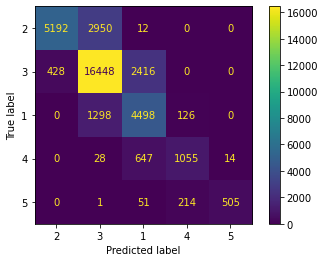

In [204]:
print('Linear Regression Confusion Matrix with labels\n\n');

dictsplay_labels=y.unique()

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictsplay_labels)

disp = disp.plot()

plt.show()


### Random Forest

In [205]:
regr = RandomForestRegressor(max_depth=2, random_state=0)


In [206]:

start_time = time.time()
regr.fit(X_train, y_train)
print("---Time taken to fit Model:  %s seconds ---" % (time.time() - start_time))


---Time taken to fit Model:  2.5440866947174072 seconds ---


In [207]:
y_pred=regr.predict(X_test)

In [208]:
regr.score(X_test, y_test)

accuracy = regr.score(X_test, y_test)
Models.append(['Random Forest',accuracy])
accuracy

0.6923263992260844

In [209]:
# performing predictions on the test datdaset
pred = regr.predict(X_test)
prediction = list(map(round, pred))
cm_regr=confusion_matrix(y_test, prediction)
cm_regr

array([[ 7242,   912,     0,     0,     0],
       [ 5227, 13855,   210,     0,     0],
       [    5,  3021,  2855,    41,     0],
       [    0,    47,   752,   945,     0],
       [    0,     1,    67,   703,     0]])

Random Forest Confusion Matrix with labels




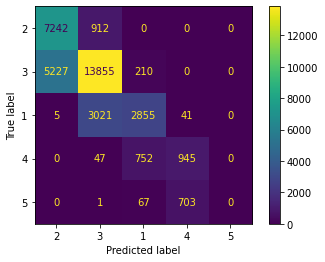

In [210]:
print('Random Forest Confusion Matrix with labels\n\n');

dictsplay_labels=y.unique()

disp = ConfusionMatrixDisplay(confusion_matrix=cm_regr, display_labels=dictsplay_labels)

disp = disp.plot()

plt.show()


In [211]:
importances = list(regr.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda X_train: X_train[1], reverse = True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BLDG_VALUE_bins      Importance: 1.0
Variable: KITCHEN              Importance: 0.0
Variable: CITY                 Importance: 0.0
Variable: BLDG_TYPE            Importance: 0.0
Variable: EXT_FINISHED         Importance: 0.0
Variable: EXT_COND             Importance: 0.0
Variable: BTHRM_STYLE1         Importance: 0.0
Variable: KITCHEN_TYPE         Importance: 0.0
Variable: HEAT_TYPE            Importance: 0.0
Variable: AC_TYPE              Importance: 0.0


In [213]:
## Extracting the best features from the modle using Stepwise Selection

sfs = SequentialFeatureSelector(regr, n_features_to_select=3)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out()

array(['KITCHEN', 'CITY', 'BLDG_VALUE_bins'], dtype=object)

#### LightGBM Regression


In [214]:
start_time = time.time()
lgb_model = LGBMRegressor(subsample=0.9).fit(X_train, y_train)
print("---Time taken to fit Model:  %s seconds ---" % (time.time() - start_time))

#best_params = lgb_random.best_params_
#print(best_params)

---Time taken to fit Model:  0.6953699588775635 seconds ---


In [215]:

accuracy = lgb_model.score(X_train, y_train)
Models.append(['LightGBM',accuracy]) # LightGBM Regression accuracy
accuracy

0.8649300695456648

In [216]:
# performing predictions on the test datdaset
pred = lgb_model.predict(X_test)
prediction = list(map(round, pred))


In [217]:
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print("== LightGBM Regression ==")
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Mean Squared Error = ', mean_squared_error(y_test, prediction))

== LightGBM Regression ==
Confusion Matrix : 
 [[ 6179  1971     4     0     0]
 [  463 18056   773     0     0]
 [    0  1377  4213   332     0]
 [    0     4   188  1498    54]
 [    0     0     2    69   700]]
Mean Squared Error =  0.14678259900231308


LightGBM Regression Confusion Matrix with labels




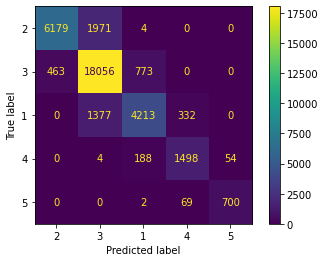

In [218]:
print('LightGBM Regression Confusion Matrix with labels\n\n');

dictsplay_labels=y.unique()

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictsplay_labels)

disp = disp.plot()

plt.show()


In [219]:
lgb_model.feature_importances_

importances = list(lgb_model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda X_train: X_train[1], reverse = True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CITY                 Importance: 864
Variable: BLDG_TYPE            Importance: 495
Variable: BLDG_VALUE_bins      Importance: 348
Variable: KITCHEN_TYPE         Importance: 341
Variable: EXT_FINISHED         Importance: 261
Variable: BTHRM_STYLE1         Importance: 185
Variable: KITCHEN              Importance: 176
Variable: EXT_COND             Importance: 162
Variable: HEAT_TYPE            Importance: 87
Variable: AC_TYPE              Importance: 81


In [220]:
## Extracting the best features from the modle using Stepwise Selection

sfs = SequentialFeatureSelector(lgb_model, n_features_to_select=3)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out()

array(['CITY', 'KITCHEN_TYPE', 'BLDG_VALUE_bins'], dtype=object)

### Model Regularization for Stable Sample Rollouts

#### Ridge regression


In [221]:
start_time = time.time()
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
print("---Time taken to fit Model:  %s seconds ---" % (time.time() - start_time))

---Time taken to fit Model:  0.023164033889770508 seconds ---


In [222]:


accuracy = ridge.score(X_train, y_train)
Models.append(['Ridge Regression',accuracy])# Ridge Regression accuracy
accuracy


0.7867036335532573

In [223]:
## Extracting the best features from the modle using Stepwise Selection
sfs = SequentialFeatureSelector(ridge, n_features_to_select=2)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out()

array(['KITCHEN_TYPE', 'BLDG_VALUE_bins'], dtype=object)

#### Lasso regression


In [224]:
start_time = time.time()
lasso = Lasso(alpha=0.01).fit(X_train, y_train) 
print("---Time taken to fit Model:  %s seconds ---" % (time.time() - start_time))
pred_train_lasso = lasso.predict(X_train)

---Time taken to fit Model:  0.0307159423828125 seconds ---


In [225]:

accuracy = lasso.score(X_train, y_train)
Models.append(['Lasso Regression',accuracy]) # Lasso Regression
accuracy


0.7859086926156237

In [226]:
## Extracting the best features from the modle using Stepwise Selection

sfs = SequentialFeatureSelector(lasso, n_features_to_select=2)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out()

array(['KITCHEN_TYPE', 'BLDG_VALUE_bins'], dtype=object)

### Model Comparison

In [227]:
## A Table to see, AllModels Accuracy 


AllModels = pd.DataFrame(Models,columns=['Model','Accuracy'])

AllModels.sort_values(by=['Accuracy'],inplace=True,ascending=False)
AllModels

,Model,Accuracy
2,LightGBM,0.86
3,Ridge Regression,0.79
4,Lasso Regression,0.79
0,Linear Regression,0.77
1,Random Forest,0.69


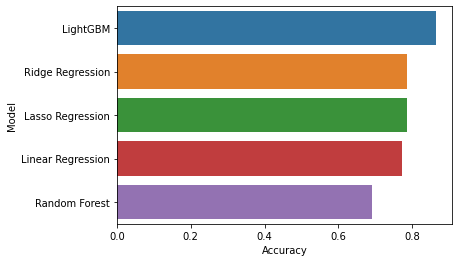

In [228]:
## A Bar plot to see, AllModels Accuracy 

sns.barplot(data=AllModels, x='Accuracy', y='Model')